In [1]:
from polygon import RESTClient

from dotenv import load_dotenv
load_dotenv('/root/.env')
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
sns.set_style("darkgrid")

In [3]:
client = RESTClient(os.environ.get('POLYGON_API_KEY'))

In [4]:
def get_data(ticker, start_date, end_date):
    df = pd.DataFrame(client.list_aggs(ticker,
                                    1,
                                    "day",
                                    start_date,
                                    end_date,
                                    limit=50000))

    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df.rename(columns = {"timestamp": "date"})
    df = df.set_index('date')
    return df

In [5]:
vmw = get_data('VMW', '2023-07-01', '2023-10-14')
avgo = get_data('AVGO', '2023-07-01', '2023-10-14')

In [6]:
vmw['close']

date
2023-07-03 04:00:00    144.04
2023-07-05 04:00:00    143.72
2023-07-06 04:00:00    142.06
2023-07-07 04:00:00    141.40
2023-07-10 04:00:00    144.06
                        ...  
2023-10-09 04:00:00    169.10
2023-10-10 04:00:00    169.80
2023-10-11 04:00:00    171.48
2023-10-12 04:00:00    178.71
2023-10-13 04:00:00    177.76
Name: close, Length: 73, dtype: float64

In [7]:
trade = avgo['close'] # - avgo['close'] * 0.252 * 0.5

In [8]:
from aaron_research.utils.helpers import plot_cumulative_returns

In [9]:
vmw

,open,high,low,close,volume,vwap,transactions,otc
date,,,,,,,,
2023-07-03 04:00:00,142.89,144.9800,142.700,144.04,721976.0,143.8781,11766,None
2023-07-05 04:00:00,143.05,144.4500,142.845,143.72,821087.0,143.7102,14685,None
2023-07-06 04:00:00,142.54,143.0000,141.250,142.06,927774.0,141.9311,15361,None
2023-07-07 04:00:00,141.74,142.7800,141.260,141.40,605380.0,142.0801,10627,None
2023-07-10 04:00:00,141.54,144.2800,141.540,144.06,930843.0,143.5463,17120,None
...,...,...,...,...,...,...,...,...
2023-10-09 04:00:00,167.04,169.5600,167.040,169.10,805271.0,168.6727,15031,None
2023-10-10 04:00:00,169.10,171.6000,169.100,169.80,2192130.0,170.1593,21137,None
2023-10-11 04:00:00,170.00,171.8100,169.460,171.48,2345551.0,170.7155,19660,None


/root/src/crypto-astraea/aaron_research/utils/helpers.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * positions.abs().values.sum() / trades.abs().values.sum()


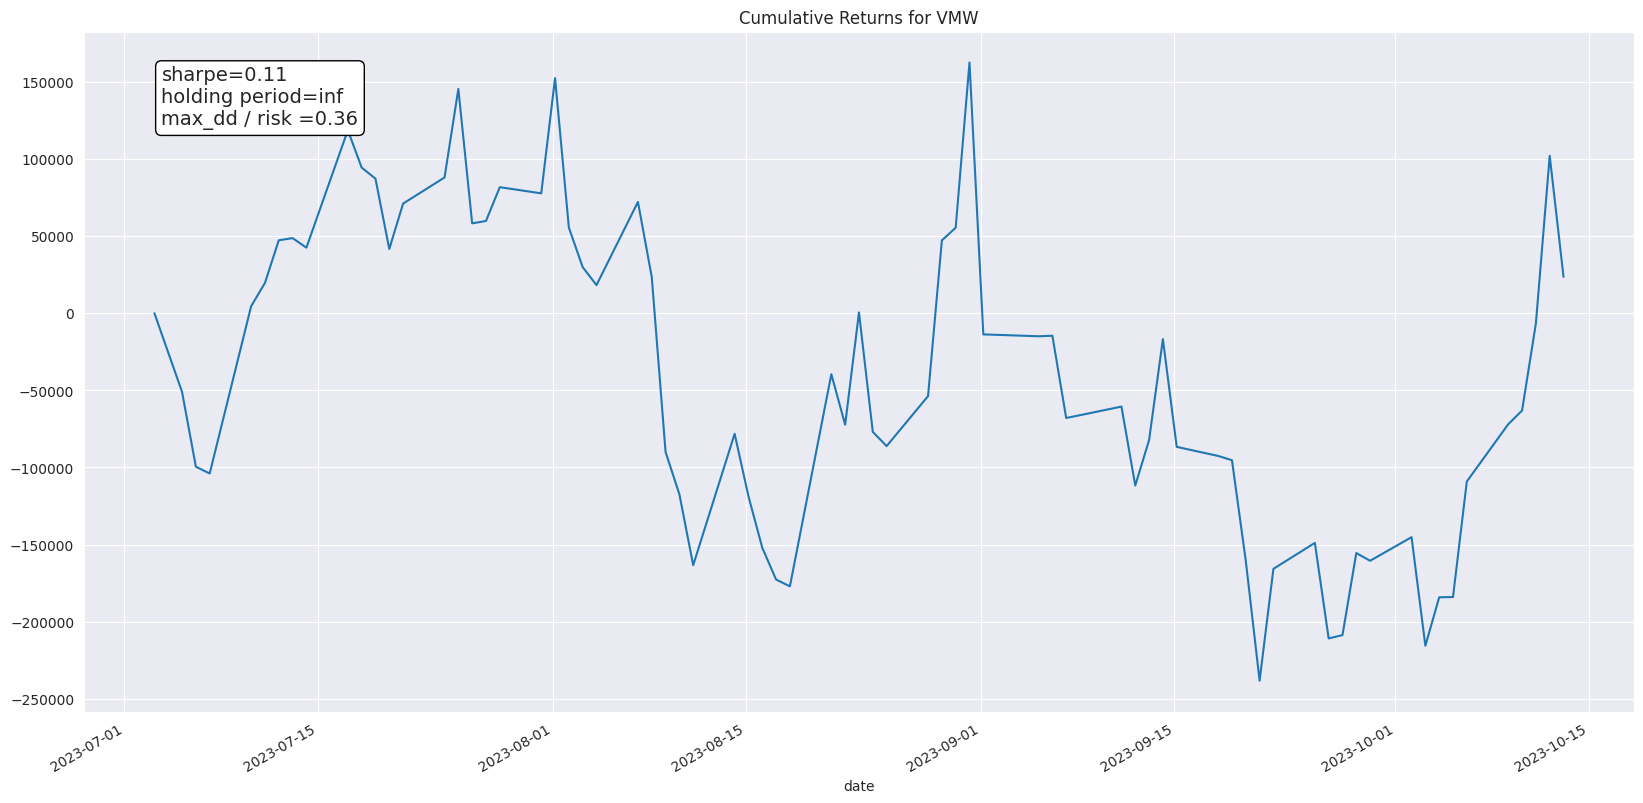

In [10]:
plot_cumulative_returns(pd.Series(1, trade.index), (trade * 3500).diff().fillna(0), 'VMW')